In [35]:
# library imports
import scipy.stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import parser
# custom imports
from utils.sentimentAnalysis import SentimentAnalyzer

# Preparing the data for hypothesis tests

## Data prep

In [31]:
data = pd.read_csv('sampleData/finaldataset.csv')
head = data.head()
head

,Unnamed: 0,review_id,user_id,business_id,useful,funny,stars,cool,text,date,influencer
0,5977,3XZ0_xt5bP1kD58Xi4hRxQ,hWDybu_KvYLSdEFzGrniTw,dXCZXOlks37U7IVXepcBDA,12,7,3.0,9,I almost wish that I had a picnic basket and a...,2017-04-19 14:19:30,1
1,6037,9PFcEyPcwOMJX9xEctMPLA,hWDybu_KvYLSdEFzGrniTw,l_kefVF1frmC0xRW2YkvUA,2,4,2.0,1,Young hotties all around and a racket loud eno...,2012-03-01 15:09:45,1
2,9550,JMh-VnxC1zkZLZAGOJI7Ag,hWDybu_KvYLSdEFzGrniTw,42DvUONuqa1mC1YbnZ0o0w,4,4,3.0,3,New new new Taco Bell on South Tryon a little ...,2015-05-26 13:38:53,1
3,10115,n4rdRnngI96I0k2ifN_Zxw,Hi10sGSZNxQH3NLyWSZ1oA,hcFSc0OHgZJybnjQBrL_8Q,28,24,4.0,25,"If you want breakfast food, go to Eggyday Nood...",2017-03-15 21:46:36,1
4,10473,zUxl5xVaTPrKthmk0DwuVw,hWDybu_KvYLSdEFzGrniTw,OqJtHcr5AsyuIjd2ePqLzw,2,2,4.0,2,Tasty food and large portions in this strip ma...,2013-06-24 16:06:01,1


In [7]:
# cleaning: drop first col
data.columns
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,review_id,user_id,business_id,useful,funny,stars,cool,text,date,influencer
0,3XZ0_xt5bP1kD58Xi4hRxQ,hWDybu_KvYLSdEFzGrniTw,dXCZXOlks37U7IVXepcBDA,12,7,3.0,9,I almost wish that I had a picnic basket and a...,2017-04-19 14:19:30,1
1,9PFcEyPcwOMJX9xEctMPLA,hWDybu_KvYLSdEFzGrniTw,l_kefVF1frmC0xRW2YkvUA,2,4,2.0,1,Young hotties all around and a racket loud eno...,2012-03-01 15:09:45,1
2,JMh-VnxC1zkZLZAGOJI7Ag,hWDybu_KvYLSdEFzGrniTw,42DvUONuqa1mC1YbnZ0o0w,4,4,3.0,3,New new new Taco Bell on South Tryon a little ...,2015-05-26 13:38:53,1
3,n4rdRnngI96I0k2ifN_Zxw,Hi10sGSZNxQH3NLyWSZ1oA,hcFSc0OHgZJybnjQBrL_8Q,28,24,4.0,25,"If you want breakfast food, go to Eggyday Nood...",2017-03-15 21:46:36,1
4,zUxl5xVaTPrKthmk0DwuVw,hWDybu_KvYLSdEFzGrniTw,OqJtHcr5AsyuIjd2ePqLzw,2,2,4.0,2,Tasty food and large portions in this strip ma...,2013-06-24 16:06:01,1


In [33]:
# converting the dates to `datetime` objects (timestamps)
data['date'] = data['date'].apply(parser.parse)
# for seeing the types quickly
data.dtypes

Unnamed: 0              int64
review_id              object
user_id                object
business_id            object
useful                  int64
funny                   int64
stars                 float64
cool                    int64
text                   object
date           datetime64[ns]
influencer              int64
dtype: object

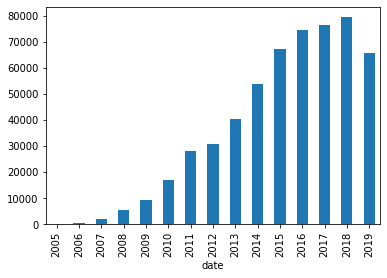

In [51]:
# Visualise the reviews timestamps
res = data['date'].groupby(data['date'].dt.year).count()
res.plot(kind='bar')

# Setting up the hypothesis tests

- Null hyp: No change in the ratio of positive because of the influencer's positive review
- Alt hyp: There is an increase in the ratio of positive reviews after influencer's positive review 

([citation](https://online.stat.psu.edu/statprogram/reviews/statistical-concepts/proportions#toggleSidebar))

In [26]:
# dummy values for now
rp0 = 0.5
rp1 = 0.9
n = 30
alpha = 0.05

In [27]:
# test statistic
z = (rp1-rp0)/ np.sqrt((rp0*(1-rp0))/n)
z

4.3817804600413295

In [28]:
pValue = 1 - st.norm.cdf(z)
pValue

5.8856695488440636e-06

In [29]:
if pValue < alpha :
    print('null rejected')
else : 
    print('cannot reject null')

null rejected
